In [1]:
# imports libraries
import os
import sys
import glob
#import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
#import importlib
import math

%matplotlib inline 

# Grabs the preprocessing and automatic_sync files
sys.path.append(os.path.join(os.pardir,'pythonCode'))
import preprocessing as pp
import automatic_sync as autoS

In [2]:
rawDataPath = os.path.join(os.pardir,'rawData')
files = glob.glob(os.path.join(rawDataPath,'*.wav'))
names = []
        
for name in files:
    fileName = os.path.basename(name).split(".")[0]
    names.append(fileName)

# Determines which cameras will be selected (['Bents'],['Camera Location'],['Motion #'])

filt = (None,None,['18']) # Selects the bent 1 cameras during motion 18

# Applies filter to camera names and returns only selected subset names
audioFiles = pp.getKeys(names,filt);

# Reads the .wav files from the list generted by getKeys
(names,cDataset) = pp.readWAV(rawDataPath,audioFiles);

Opening GP_B1_NL_18 ...
Opening GP_B1_NU_18 ...
Opening GP_B1_SL_18 ...
Opening GP_B1_SU_18 ...
Opening GP_B2_SL_18 ...
Opening GP_B2_SU_18 ...
Opening GP_B3_NL_18 ...
Opening GP_B3_NU_18 ...
Opening GP_B3_SL_18 ...
Opening GP_B3_SU_18 ...


In [19]:
def highpass_filter(origSignal,Fs,F1,F2,method='ellip',show=False):
    '''
    
    '''
    Nf = Fs/2; # Nyquist freqency in Hz
    b,a = signal.iirdesign(F1/Nf,F2/Nf,0.2,80,ftype=method)
    w, h = signal.freqz(b, a)
    
    if show is True:
        fig = plt.figure()
        plt.title('Digital filter frequency response')
        plt.plot(Nf*w/math.pi, 20 * np.log10(abs(h)), 'b')
        plt.ylabel('Amplitude [dB]', color='b')
        plt.xlabel('Frequency [Hz]')
        return None, None
    elif show is False:
        filteredSignal = signal.filtfilt(b,a,origSignal,padlen=150)
        time = np.linspace(0,(1/Fs)*len(filteredSignal),len(filteredSignal))
        return time, filteredSignal

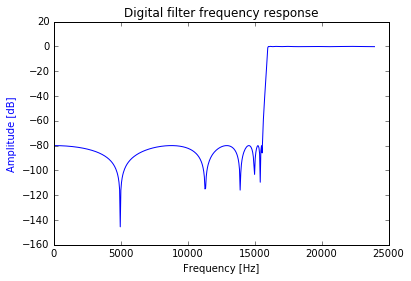

In [20]:
# Displays highpass filter design
time, newSig = highpass_filter(None,48000,16000,15500,show=True)

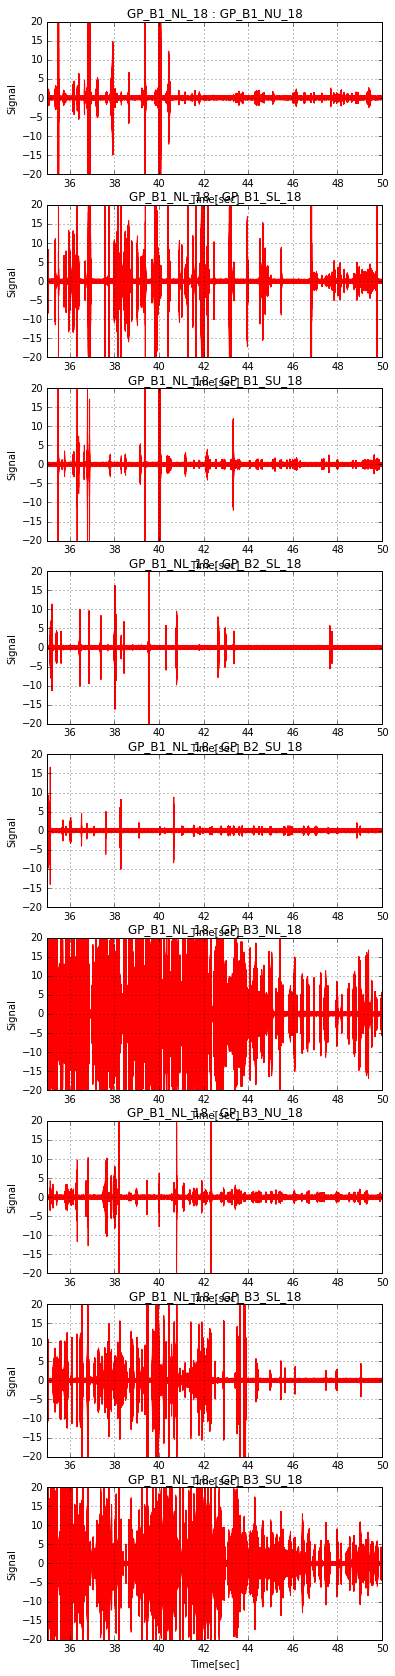

In [23]:
# Applies a high pass filter over each of the channels to reduce noise levels
plt.figure(figsize=(6,3*len(names)-1))
count = 1
means = {}

for name in names[1:]:
    chan = cDataset[name][:,0] 
    time, newSig = highpass_filter(chan,48000,15100,15000)
    
    plt.subplot(len(names)-1,1,count)
    plt.plot(time,newSig,'r')
    plt.xlabel('Time[sec]')
    plt.ylabel('Signal')
    plt.title(names[0] + " : " + name)
    plt.grid()
    plt.ylim((-20,20))
    plt.xlim((35,50))
    count = count+1
    
plt.draw()

In [ ]:
# Adds all of the channels together. Does not work well because some channels have more noise that others.
Fs = 48000
sumSig = np.zeros_like(sDataset[names[0]][:,0])
for name in names:
    sumSig = sumSig + np.array(sDataset[name][:,0],dtype = 'float64')
    
time = np.linspace(0,(1/Fs)*len(sumSig),len(sumSig))

In [ ]:
# Normalizes the functions to have the same mean power
scales = {}
sDataset = {} # new Scaled Dataset (hopefully makes the noise levels roughly the same)
Fs = 48000; #sampling frequency in Hz
for name in names:
    csignal = cDataset[name][:,0]
    time = (1/Fs)*np.linspace(0,len(csignal),len(csignal))
    integral = np.trapz(abs(csignal),time)
    scales[name]= integral
    sDataset[name] = csignal/integral
    
print(scales)